In [19]:
import random
import networkx as nx
import numpy as np 
import pandas as pd 

# for basic visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
filename = 'input_real.txt'
filePosition = 'input_position_real.txt'
edgelist = open(filename, 'r')
positionList = open(filePosition, 'r')

In [80]:
yourResult = [line.strip().split(' ') for line in edgelist.readlines()]
yourPosition = [line.strip().split(' ') for line in positionList.readlines()]

In [81]:
edgelist = [[int(x) for x in lst] for lst in yourResult]
positionList = [[int(x) for x in lst] for lst in yourPosition]

In [82]:
positionList

[[1, 2, -2],
 [2, 6, -2],
 [3, 8, -2],
 [4, 8, -4],
 [5, 8, 0],
 [6, 12, -2],
 [7, 16, -2],
 [8, 18, -4],
 [9, 20, -2],
 [10, 20, -4],
 [11, 22, -4],
 [12, 22, -6],
 [13, 24, -4],
 [14, 20, -8],
 [15, 22, -8],
 [16, 18, -10],
 [17, 20, -10],
 [18, 22, -10],
 [19, 24, -6],
 [20, 24, -10],
 [21, 14, -4],
 [22, 18, -6],
 [23, 12, -6],
 [24, 14, -8],
 [25, 12, -10],
 [26, 6, -6],
 [27, 8, -6],
 [28, 8, -8],
 [29, 6, -8],
 [30, 8, -10],
 [31, 10, -8],
 [32, 6, -12],
 [33, 2, -16],
 [34, 4, -18],
 [35, 6, -16],
 [36, 12, -14],
 [37, 12, -16],
 [38, 12, -18],
 [39, 24, -14],
 [40, 24, -16],
 [41, 26, -16],
 [42, 26, -18],
 [43, 26, -20],
 [44, 24, -18],
 [45, 24, -20],
 [46, 26, -22],
 [47, 26, -24],
 [48, 26, -26],
 [49, 24, -24],
 [50, 26, -28],
 [51, 24, -28],
 [52, 24, -30],
 [53, 20, -30],
 [54, 20, -32],
 [55, 24, -32],
 [56, 24, -34],
 [57, 24, -36],
 [58, 20, -34],
 [59, 20, -36],
 [60, 24, -38],
 [61, 28, -36],
 [62, 28, -34],
 [63, 28, -38],
 [64, 26, -38],
 [65, 24, -40],
 [66, 20,

In [83]:
def make_graph(edgelist):
    graph = {}
    for e1, e2, weight in edgelist:
        graph.setdefault(e1, {}).setdefault(e2, weight)
        graph.setdefault(e2, {}).setdefault(e1, weight)
    return graph

In [84]:
def make_position(positionList):
    position = {}
    for nodes, x, y in positionList:
        position.setdefault(nodes, (x, y))
    return position

In [85]:
position = make_position(positionList)
position

{1: (2, -2),
 2: (6, -2),
 3: (8, -2),
 4: (8, -4),
 5: (8, 0),
 6: (12, -2),
 7: (16, -2),
 8: (18, -4),
 9: (20, -2),
 10: (20, -4),
 11: (22, -4),
 12: (22, -6),
 13: (24, -4),
 14: (20, -8),
 15: (22, -8),
 16: (18, -10),
 17: (20, -10),
 18: (22, -10),
 19: (24, -6),
 20: (24, -10),
 21: (14, -4),
 22: (18, -6),
 23: (12, -6),
 24: (14, -8),
 25: (12, -10),
 26: (6, -6),
 27: (8, -6),
 28: (8, -8),
 29: (6, -8),
 30: (8, -10),
 31: (10, -8),
 32: (6, -12),
 33: (2, -16),
 34: (4, -18),
 35: (6, -16),
 36: (12, -14),
 37: (12, -16),
 38: (12, -18),
 39: (24, -14),
 40: (24, -16),
 41: (26, -16),
 42: (26, -18),
 43: (26, -20),
 44: (24, -18),
 45: (24, -20),
 46: (26, -22),
 47: (26, -24),
 48: (26, -26),
 49: (24, -24),
 50: (26, -28),
 51: (24, -28),
 52: (24, -30),
 53: (20, -30),
 54: (20, -32),
 55: (24, -32),
 56: (24, -34),
 57: (24, -36),
 58: (20, -34),
 59: (20, -36),
 60: (24, -38),
 61: (28, -36),
 62: (28, -34),
 63: (28, -38),
 64: (26, -38),
 65: (24, -40),
 66: (20,

In [86]:
graph = make_graph(edgelist)
graph

{1: {2: 5, 4: 20},
 2: {1: 5, 5: 18, 3: 5},
 4: {1: 20, 3: 17, 26: 9, 27: 9},
 5: {2: 18, 3: 17, 6: 15},
 3: {2: 5, 5: 17, 4: 17},
 6: {5: 15, 7: 8, 8: 19},
 7: {6: 8, 9: 15},
 8: {6: 19, 21: 8, 22: 9},
 9: {7: 15, 10: 7},
 10: {9: 7, 11: 7},
 11: {10: 7, 12: 5},
 12: {11: 5, 13: 8, 14: 12, 15: 11},
 13: {12: 8, 15: 14, 19: 9},
 14: {12: 12, 15: 5, 16: 7, 17: 7},
 46: {47: 5, 43: 3, 45: 10, 44: 10},
 47: {46: 5, 48: 3, 45: 10, 49: 10},
 48: {47: 3, 50: 3, 49: 10},
 50: {48: 3, 51: 3, 49: 11},
 51: {50: 3, 49: 17, 53: 23, 52: 6},
 45: {49: 3, 46: 10, 47: 10, 44: 3},
 49: {45: 3, 51: 17, 47: 10, 48: 10, 50: 11},
 42: {43: 3, 41: 3},
 43: {42: 3, 46: 3, 44: 9},
 53: {51: 23, 54: 3, 55: 3},
 54: {53: 3, 56: 7},
 52: {51: 6, 55: 8},
 34: {71: 15, 38: 26, 35: 7, 33: 15},
 71: {34: 15, 73: 29, 72: 28},
 73: {71: 29, 72: 10, 74: 8},
 72: {71: 28, 73: 10, 74: 9},
 74: {73: 8, 72: 9, 75: 23, 76: 6},
 75: {74: 23, 78: 16, 79: 17, 76: 16, 77: 15},
 78: {75: 16, 80: 9, 77: 3, 79: 4},
 79: {75: 17, 

## Inisialisasi Populasi Secara Random

1. Pilih start dari node yang mana
2. Dari node tersebut, pilih pasangan node (key di dalam key) lainnya secara random
3. Setelah didapat node secara random, pasangkan dengan key dictnya
4. Simpan hasilnya ke dalam list

In [87]:
def make_individual(start, graph):
#Initialize a multicast tree
    start = start
    items = random.choice(list(graph[start].items()))
    end = items[0]
    weight = items[1]
    mst = []
    mst.append([start, end, weight])
    circuit_start = []
    circuit_end = []
    circuit_end.append(end)

    closed = []
    closed.append([start, end])
    closed.append([end, start])
    circuit_start.append(start)
    i = 1
    #Generate random path which from the tree T to the destination node d as RunPath(u, d)
    while (i < len(graph) - 1):
        start = items[0]
        items = random.choice(list(graph[start].items()))
        end = items[0]
        
        weight = items[1]
        if [start, end] in closed:
            continue
        if end in circuit_start:
            continue 
        if end in circuit_end:
            continue
            
        mst.append([start, end, weight])
        circuit_start.append(end)
        circuit_end.append(end)
        closed.append([start, end])
        closed.append([end, start])
        i = i+1

    assert len(mst) == len(graph) - 1
    return mst

In [88]:
def counting_weight(mst):
    bobot = 0
    for i in range(len(mst)):
        bobot = bobot+mst[i][2]
    return bobot

In [89]:
position_nodes = position.keys()

In [90]:
position

{1: (2, -2),
 2: (6, -2),
 3: (8, -2),
 4: (8, -4),
 5: (8, 0),
 6: (12, -2),
 7: (16, -2),
 8: (18, -4),
 9: (20, -2),
 10: (20, -4),
 11: (22, -4),
 12: (22, -6),
 13: (24, -4),
 14: (20, -8),
 15: (22, -8),
 16: (18, -10),
 17: (20, -10),
 18: (22, -10),
 19: (24, -6),
 20: (24, -10),
 21: (14, -4),
 22: (18, -6),
 23: (12, -6),
 24: (14, -8),
 25: (12, -10),
 26: (6, -6),
 27: (8, -6),
 28: (8, -8),
 29: (6, -8),
 30: (8, -10),
 31: (10, -8),
 32: (6, -12),
 33: (2, -16),
 34: (4, -18),
 35: (6, -16),
 36: (12, -14),
 37: (12, -16),
 38: (12, -18),
 39: (24, -14),
 40: (24, -16),
 41: (26, -16),
 42: (26, -18),
 43: (26, -20),
 44: (24, -18),
 45: (24, -20),
 46: (26, -22),
 47: (26, -24),
 48: (26, -26),
 49: (24, -24),
 50: (26, -28),
 51: (24, -28),
 52: (24, -30),
 53: (20, -30),
 54: (20, -32),
 55: (24, -32),
 56: (24, -34),
 57: (24, -36),
 58: (20, -34),
 59: (20, -36),
 60: (24, -38),
 61: (28, -36),
 62: (28, -34),
 63: (28, -38),
 64: (26, -38),
 65: (24, -40),
 66: (20,

In [91]:
def make_network_viz(graph):
    g = nx.Graph()
    for edge in graph:
        g.add_edge(edge[0],edge[1], weight = edge[2])

    import warnings
    warnings.filterwarnings('ignore')

    plt.rcParams['figure.figsize'] = (11, 11)
    plt.style.use('fivethirtyeight')

    pos = nx.spring_layout(g, pos = position, fixed = position_nodes, weight = 'weight')

    # drawing nodes
    nx.draw_networkx(g, pos, arrows = True, node_color='green', node_size=350)
    edge_labels=dict([((u,v,),d['weight']) for u,v,d in g.edges(data=True)])
    nx.draw_networkx_edge_labels(g,pos,edge_labels=edge_labels, font_color='green', font_size=10)
    #plt.title('Undirected Graphs', fontsize = 20)
    plt.axis('on')
    plt.show()

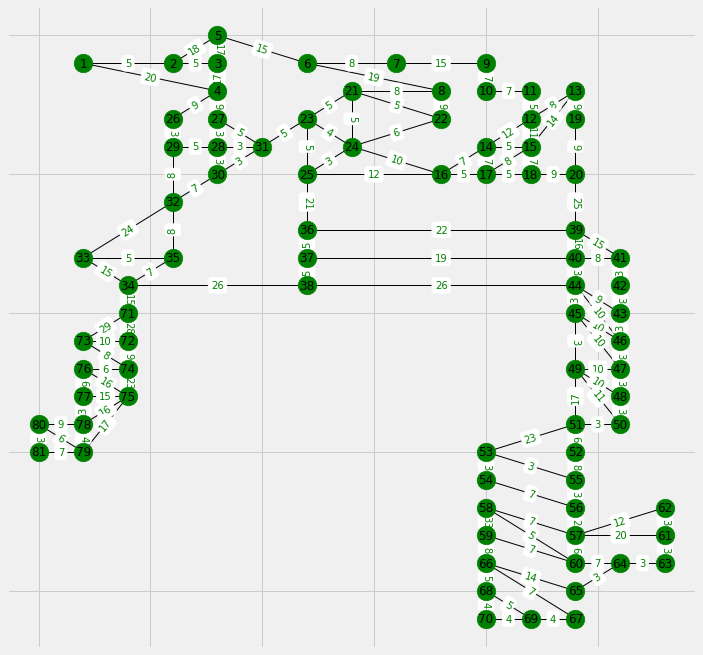

In [92]:
graph_viz = make_network_viz(edgelist)

In [93]:
mst = make_individual(1, graph)
mst

[[1, 2, 5],
 [1, 4, 20],
 [4, 26, 9],
 [26, 29, 5],
 [29, 32, 8],
 [29, 28, 5],
 [28, 27, 3],
 [28, 31, 3],
 [31, 23, 5],
 [23, 21, 5],
 [21, 22, 6],
 [21, 24, 5],
 [21, 8, 8],
 [8, 6, 19],
 [6, 5, 15],
 [5, 3, 17],
 [23, 25, 5],
 [25, 36, 21],
 [36, 37, 5],
 [37, 38, 5],
 [38, 44, 26],
 [44, 45, 3],
 [45, 46, 10],
 [38, 34, 26],
 [34, 35, 7],
 [35, 33, 5],
 [32, 30, 7],
 [36, 39, 22],
 [39, 20, 25],
 [20, 19, 9],
 [19, 13, 9],
 [13, 12, 8],
 [12, 15, 11],
 [15, 18, 7],
 [18, 17, 5],
 [15, 14, 5],
 [12, 11, 5],
 [17, 16, 5],
 [39, 41, 15],
 [41, 40, 8],
 [45, 47, 10],
 [46, 43, 3],
 [43, 42, 3],
 [47, 48, 3],
 [47, 49, 10],
 [49, 50, 11],
 [49, 51, 17],
 [51, 53, 23],
 [53, 54, 3],
 [54, 56, 7],
 [56, 55, 3],
 [55, 52, 8],
 [34, 71, 15],
 [71, 73, 29],
 [73, 74, 8],
 [74, 75, 23],
 [75, 77, 15],
 [77, 76, 6],
 [77, 78, 3],
 [78, 79, 4],
 [74, 72, 9],
 [11, 10, 7],
 [10, 9, 7],
 [9, 7, 15],
 [78, 80, 9],
 [80, 81, 3],
 [56, 57, 2],
 [57, 58, 7],
 [57, 61, 20],
 [61, 63, 3],
 [58, 59, 33

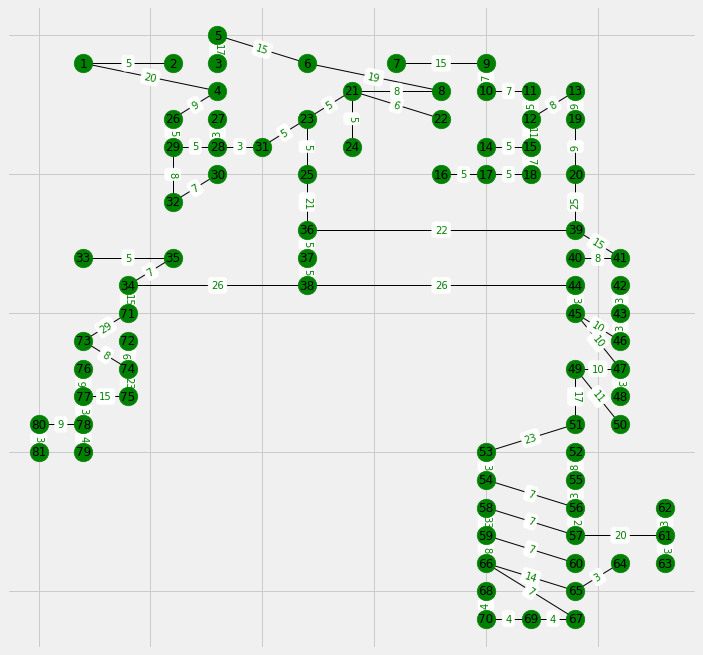

In [94]:
individual = make_network_viz(mst)

In [95]:
make_graph(mst)

{1: {2: 5, 4: 20},
 2: {1: 5},
 4: {1: 20, 26: 9},
 26: {4: 9, 29: 5},
 29: {26: 5, 32: 8, 28: 5},
 32: {29: 8, 30: 7},
 28: {29: 5, 27: 3, 31: 3},
 27: {28: 3},
 31: {28: 3, 23: 5},
 23: {31: 5, 21: 5, 25: 5},
 21: {23: 5, 22: 6, 24: 5, 8: 8},
 22: {21: 6},
 24: {21: 5},
 8: {21: 8, 6: 19},
 6: {8: 19, 5: 15},
 5: {6: 15, 3: 17},
 3: {5: 17},
 25: {23: 5, 36: 21},
 36: {25: 21, 37: 5, 39: 22},
 37: {36: 5, 38: 5},
 38: {37: 5, 44: 26, 34: 26},
 44: {38: 26, 45: 3},
 45: {44: 3, 46: 10, 47: 10},
 46: {45: 10, 43: 3},
 34: {38: 26, 35: 7, 71: 15},
 35: {34: 7, 33: 5},
 33: {35: 5},
 30: {32: 7},
 39: {36: 22, 20: 25, 41: 15},
 20: {39: 25, 19: 9},
 19: {20: 9, 13: 9},
 13: {19: 9, 12: 8},
 12: {13: 8, 15: 11, 11: 5},
 15: {12: 11, 18: 7, 14: 5},
 18: {15: 7, 17: 5},
 17: {18: 5, 16: 5},
 14: {15: 5},
 11: {12: 5, 10: 7},
 16: {17: 5},
 41: {39: 15, 40: 8},
 40: {41: 8},
 47: {45: 10, 48: 3, 49: 10},
 43: {46: 3, 42: 3},
 42: {43: 3},
 48: {47: 3},
 49: {47: 10, 50: 11, 51: 17},
 50: {49

## Create Population

In [39]:
def create_population(popSize, startNode):
    popList = []
    for i in range(popSize):
        popList.append(make_individual(startNode, graph))
    return popList

In [40]:
pop_size = 100
start_node = 1

In [41]:
popList = create_population(pop_size, start_node)
random.choice(popList)

[[1, 11, 8],
 [11, 10, 12],
 [10, 9, 11],
 [11, 6, 14],
 [6, 4, 7],
 [4, 5, 4],
 [5, 2, 12],
 [5, 7, 23],
 [4, 3, 11],
 [3, 8, 13]]

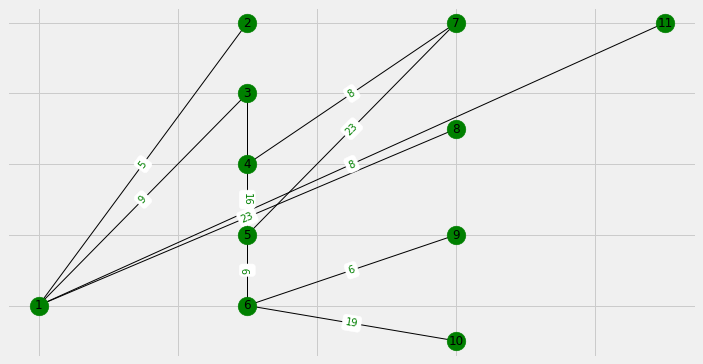

In [42]:
make_network_viz(random.choice(popList))

## Selection

In [43]:
panjang_target = 60

In [44]:
def count_weight(popList):
    total_weight= []

    for i in popList:
        total_weight.append(counting_weight(i))

    return total_weight

In [45]:
weight = count_weight(popList)

In [46]:
def count_fitness(popList):
    objective= []

    for i in popList:
        objective.append(counting_weight(i))
        
    total_fitness = float(sum(objective))
    rel_fitness = [1/f for f in objective]  # <- baru
#     rel_fitness = [f/total_fitness for f in total_weight] <- lama
    return rel_fitness

In [47]:
def roulette_selection(popList):
    fitnesses = count_fitness(popList)
    selectionResults = []
    total_fitness = float(sum(fitnesses))
    rel_fitness = [f/total_fitness for f in fitnesses]
    probs = [sum(rel_fitness[:i+1]) for i in range(len(rel_fitness))]
    new_population = []
    for n in range(pop_size):
        r = random.random()
        for (i, individual) in enumerate(popList):
            if r <= probs[i]:
                new_population.append(individual)
                break
    return new_population

In [48]:
def PartialyMatched_Crossover(parent1, parent2):
    ind1 = parent1
    ind2 = parent2
    size = min(len(ind1), len(ind2))
    p1, p2 = [0] * size, [0] * size

    # Initialize the position of each indices in the individuals
    for i in range(size):
        p1[i] = i
        p2[i] = i
    # Choose crossover points
    cxpoint1 = random.randint(0, size)
    cxpoint2 = random.randint(0, size - 1)
    if cxpoint2 >= cxpoint1:
        cxpoint2 += 1
    else:  # Swap the two cx points
        cxpoint1, cxpoint2 = cxpoint2, cxpoint1

    # Apply crossover between cx points
    for i in range(cxpoint1, cxpoint2):
        # Keep track of the selected values
        temp1 = ind1[i]
        temp2 = ind2[i]
        # Swap the matched value
        ind1[i], ind1[p1] = temp2, temp1
        ind2[i], ind2[p2] = temp1, temp2
        # Position bookkeeping
        p1[temp1], p1[temp2] = p1[temp2], p1[temp1]
        p2[temp1], p2[temp2] = p2[temp2], p2[temp1]

    return ind1, ind2

In [49]:
def Ordered_Crossover(parent1, parent2):
    ind1 = parent1
    ind2 = parent2
    size = min(len(ind1), len(ind2))
    a, b = random.sample(range(size), 2)
    if a > b:
        a, b = b, a

    holes1, holes2 = [True] * size, [True] * size
    for i in range(size):
        if i < a or i > b:
            holes1[i] = False
            holes2[i] = False

    # We must keep the original values somewhere before scrambling everything
    temp1, temp2 = ind1, ind2
    k1, k2 = b + 1, b + 1
    for i in range(size):
        if not holes1[(i + b + 1) % size]:
            ind1[k1 % size] = temp1[(i + b + 1) % size]
            k1 += 1

        if not holes2[(i + b + 1) % size]:
            ind2[k2 % size] = temp2[(i + b + 1) % size]
            k2 += 1

    # Swap the content between a and b (included)
    for i in range(a, b + 1):
        ind1[i], ind2[i] = ind2[i], ind1[i]

    return ind1, ind2

In [50]:
def elitis_selection(popList):
    fitnesses = count_fitness(popList)
    pop = []
    new_population = []
    for i in range(len(fitnesses)):
        pop.append([fitnesses[i], popList[i]])
        
    ranked_population = sorted(pop, reverse = True)
    
    for i in range (len(ranked_population)):
        new_population.append(ranked_population[i][1])

    return new_population

In [51]:
def crossover(probabilitas_OX, selected_pop):
    popRand = []
    acak = random.random()
    for i in range(len(selected_pop)):
        acak = random.random()
        popRand.append([acak, selected_pop[i]])

    matingPool = []
    for i in range (len(popRand)):
        if popRand[i][0] < probabilitas_OX:
            matingPool.append(popRand[i][1])
        else:
            continue

    sum_rand = random.randint(int(len(mst)*50/100), int(len(mst)*80/100))
    point = []
    for i in range(len(mst)):
        point.append(i)

    x=0
    while x < len(matingPool):
        point = random.sample(point, sum_rand)
        temp1 = []
        temp2 = []
        circuit_start1 = []
        circuit_start2 = []
        swap = []
        closed1 = []
        closed2 = []

        circuit_start1.append(start_node)
        temp1.append(start_node)
        items1 = random.choice(list(graph[start_node].items()))
        circuit_start2.append(start_node)
        temp2.append(start_node)
        items2 = random.choice(list(graph[start_node].items()))

        i=1
        for i in range(len(graph)-1):
            if i in point:
                swap.append(matingPool[x][i])
                swap.append(matingPool[x+1][i])
                choose = random.choice(swap)
                if choose[1] in temp1:
                    j = 1
                    while j < len(matingPool[x][i]):
                        start1 = items1[0]
                        items1 = random.choice(list(graph[start1].items()))
                        end1 = items1[0]
                        weight1 = items1[1]
                        if [start1, end1] in closed1:
                            continue
                        if [end1, start1] in closed1:
                            continue
                        if start1 not in temp1:
                            continue
                        if end1 in temp1:
                            continue
                        matingPool[x][i] = [start1, end1, weight1]
                        j += 1
                    temp1.append(end1)
                    circuit_start1.append(start1)
                    closed1.append([start1, end1])
                    closed1.append([end1, start1])
                else:        
                    matingPool[x][i] = choose
                    closed1.append([matingPool[x][i][0], matingPool[x][i][1]])
                    closed1.append([matingPool[x][i][1], matingPool[x][i][0]])
                    start1 = matingPool[x][i][1]
                    temp1.append(matingPool[x][i][1])
                    circuit_start1.append(matingPool[x][i][0])
                swap.remove(choose)
                if swap[0][1] in temp2:
                    j = 1
                    matingPool[x+1][i] = swap[0]
                    while j < len(matingPool[x+1][i]):
                        start2 = items2[0]
                        items2 = random.choice(list(graph[start2].items()))
                        end2 = items2[0]
                        weight2 = items2[1]
                        if [start2, end2] in closed2:
                            continue
                        if [end2, start2] in closed2:
                            continue
                        if start2 not in temp2:
                            continue
                        if end2 in temp2:
                            continue
                        matingPool[x+1][i] = [start2, end2, weight2]
                        j += 1
                    circuit_start2.append(start2)
                    temp2.append(end2)
                    closed2.append([start2, end2])
                    closed2.append([end2, start2])
                else:
                    matingPool[x+1][i] = swap[0]
                    closed2.append([matingPool[x+1][i][0], matingPool[x+1][i][1]])
                    closed2.append([matingPool[x+1][i][1], matingPool[x+1][i][0]])
                    start2 = matingPool[x+1][i][1]
                    temp2.append(matingPool[x+1][i][1])
                    circuit_start2.append(matingPool[x+1][i][0])
                swap.clear()
            else:
                j = 1
                while j < len(graph):
                    start1 = items1[0]
                    items1 = random.choice(list(graph[start1].items()))
                    end1 = items1[0]
                    weight1 = items1[1]
                    if [start1, end1] in closed1:
                        continue
                    if [end1, start1] in closed1:
                        continue
                    if start1 not in temp1:
                        continue
                    if end1 in temp1:
                        continue
                    matingPool[x][i] = [start1, end1, weight1]
                    j += 1
                temp1.append(matingPool[x][i][1])
                circuit_start1.append(start1)
                closed1.append([start1, end1])
                closed1.append([end1, start1])

                j = 1
                while j < len(graph):
                    start2 = items2[0]
                    items2 = random.choice(list(graph[start2].items()))
                    end2 = items2[0]
                    weight2 = items2[1]
                    if [start2, end2] in closed2:
                        continue
                    if [end2, start2] in closed2:
                        continue
                    if start2 not in temp2:
                        continue
                    if end2 in temp2:
                        continue
                    matingPool[x+1][i] = [start2, end2, weight2]
                    j += 1
                temp2.append(matingPool[x+1][i][1])
                circuit_start2.append(start2)
                closed2.append([start2, end2])
                closed2.append([end2, start2])
        x += 2
        if x == len(matingPool) - 1:
            break
    return matingPool

In [52]:
def mutation1(Mutation_probability, popList):
    popRand = []
    for i in popList:
        acak = random.random()
        if acak < Mutation_probability:
            temp = []
            closed = []
            end = []
            end.append(start_node)
            for j in i:
                temp.append(j)
                closed.append([j[0], j[1]])
                closed.append([j[1], j[0]])
                end.append(j[1])

            rand = random.randint(1, len(i)-1)
            end.remove(i[rand][1])

            j = 0
            while j < len(i):
                if j == rand:
                    nodes = random.choice(edgelist)
                    while nodes[1] in end:
                        nodes = random.choice(edgelist)
                        if [nodes[0], nodes[1]] in closed:
                            continue
                        if [nodes[1], nodes[0]] in closed:
                            continue
                        if nodes[1] in end:
                            continue
                        i = nodes
                j+=1
        else:
            continue
    return popList

In [53]:
def mutation(Mutation_probability, selected_pop):
    popRand = []
    acak = random.random()
    for i in range(len(selected_pop)):
        acak = random.random()
        popRand.append([acak, selected_pop[i]])

    mutationPool = []
    for i in range (len(popRand)):
        if popRand[i][0] < Mutation_probability:
            mutationPool.append(popRand[i][1])
        else:
            continue
    x = 0
    while x < len(mutationPool)-1:
        temp = []
        closed = []
        end = []
        end.append(start_node)
        for i in mutationPool[x]:
            temp.append(i)
            closed.append([i[0], i[1]])
            closed.append([i[1], i[0]])
            end.append(i[1])

        rand = random.randint(1, len(mutationPool[x])-1)
        end.remove(mutationPool[x][rand][1])

        i = 0
        while i < len(mutationPool[x]):
            if i == rand:
                j=0
                nodes = random.choice(edgelist)
                while nodes[1] in end:
                    nodes = random.choice(edgelist)
                    if [nodes[0], nodes[1]] in closed:
                        continue
                    if [nodes[1], nodes[0]] in closed:
                        continue
                    if nodes[1] in end:
                        continue
                    mutationPool[x][i] = nodes
                    j+=1
            i+=1
        x += 1
    return mutationPool

In [54]:
def regeneration_1(matingPool, selected_pop):
    selected_pop = selected_pop
    for i in matingPool:
        selected_pop.append(i)
    
    return selected_pop

In [55]:
def regeneration(popList, matingPool):
    fitnesses = count_weight(popList)
    population = []
    new_population = []
    for i in range(len(fitnesses)):
        population.append([fitnesses[i], popList[i]])

    ranked_population = sorted(population, reverse = False)

    for i in range(len(ranked_population)):
        new_population.append(ranked_population[i][1])

    for i in range(len(matingPool)):
        new_population.pop()

    for i in range(len(matingPool)):
        new_population.append(matingPool[i])
    
    random.shuffle(new_population)
        
    return new_population

In [56]:
def geneticAlgorithm(pop_size, generation, probabilitas_OX, Mutation_probability):
    prog = []
    popList = create_population(pop_size, start_node)
    print('bobot untuk generasi pertama: ', counting_weight(random.choice(popList)))
    for i in range(generation):
        selected_pop = roulette_selection(popList)
        matingPool = crossover(probabilitas_OX, selected_pop)
        popList = regeneration(popList, matingPool)
        popList = mutation1(Mutation_probability, popList)
        popList = elitis_selection(popList)
        best = 1/counting_weight(popList[0])
        prog.append(best)
        print('Generasi ke-', i+1, 'bobot: ', counting_weight(popList[0]))
        
    popList = elitis_selection(popList)
    print('Hasil optimasi: ', counting_weight(popList[0]))
    plt.plot(prog, linewidth = 1)
    plt.ylabel('Fitness')
    plt.xlabel('Generation')
    plt.show()
    return popList

In [57]:
popList = create_population(pop_size, start_node)

In [58]:
selected_pop = elitis_selection(popList)

In [59]:
pop_size = 100
generation = 50
probabilitas_OX = 0.5
Mutation_probability = 0.5

bobot untuk generasi pertama:  127
Generasi ke- 1 bobot:  89
Generasi ke- 2 bobot:  89
Generasi ke- 3 bobot:  84
Generasi ke- 4 bobot:  93
Generasi ke- 5 bobot:  93
Generasi ke- 6 bobot:  93
Generasi ke- 7 bobot:  87
Generasi ke- 8 bobot:  91
Generasi ke- 9 bobot:  99
Generasi ke- 10 bobot:  116
Generasi ke- 11 bobot:  105
Generasi ke- 12 bobot:  106
Generasi ke- 13 bobot:  115
Generasi ke- 14 bobot:  102
Generasi ke- 15 bobot:  104
Generasi ke- 16 bobot:  100
Generasi ke- 17 bobot:  108
Generasi ke- 18 bobot:  101
Generasi ke- 19 bobot:  101
Generasi ke- 20 bobot:  104
Generasi ke- 21 bobot:  104
Generasi ke- 22 bobot:  97
Generasi ke- 23 bobot:  102
Generasi ke- 24 bobot:  106
Generasi ke- 25 bobot:  104
Generasi ke- 26 bobot:  120
Generasi ke- 27 bobot:  116
Generasi ke- 28 bobot:  108
Generasi ke- 29 bobot:  119
Generasi ke- 30 bobot:  116
Generasi ke- 31 bobot:  123
Generasi ke- 32 bobot:  138
Generasi ke- 33 bobot:  124
Generasi ke- 34 bobot:  147
Generasi ke- 35 bobot:  135
Gene

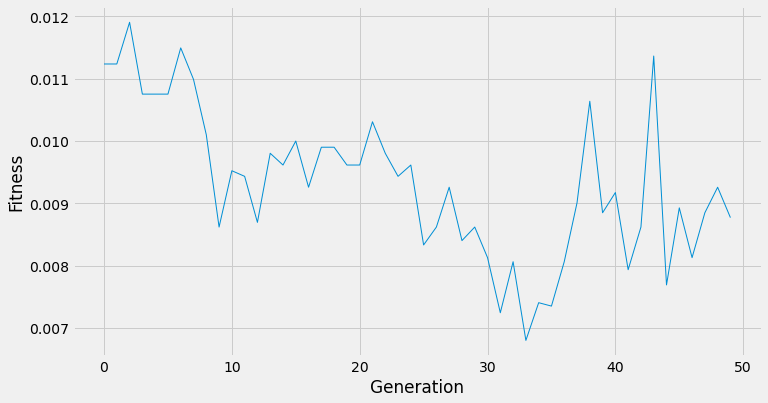

In [60]:
hasil = geneticAlgorithm(pop_size, generation, probabilitas_OX, Mutation_probability)

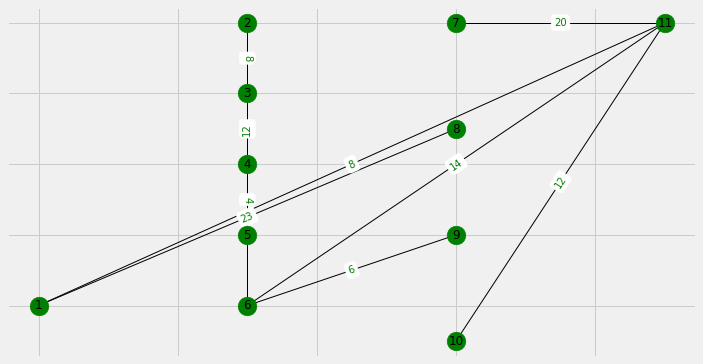

In [61]:
make_network_viz(hasil[0])

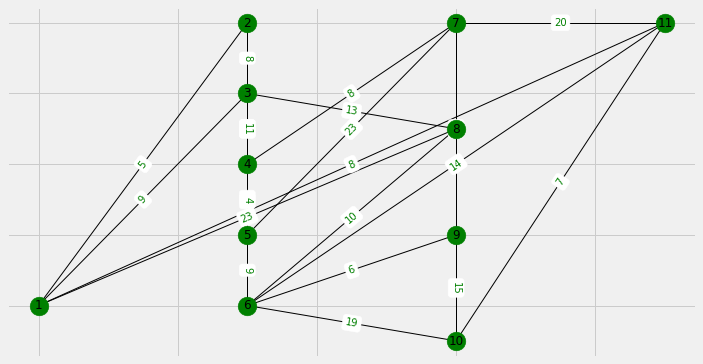

In [56]:
make_network_viz(edgelist)